In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
%matplotlib inline
import shapely as sp
from shapely.geometry import Point
from shapely.geometry import Polygon

In [52]:
blotch = pd.read_csv("C:\Users\Zade\Desktop\HonorsMaterials\ForTask1\p4_analysis\P4_catalog_v1.1_L1C_cut_0.5_blotch.csv")

In [54]:
blotch.head(1)

,marking_id,angle,tile_id,image_x,image_y,n_votes,obsid,radius_1,radius_2,vote_ratio,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,Longitude
0,B000000,2.28,APF0000cia,3330.27,5573.0,4,ESP_012079_0945,22.13,15.78,1.0,...,0.1,214.785,0.25,126.856883,-67.239204,257.001479,-3370.630963,-85.493625,-85.546304,104.661641


In [2]:
fan = pd.read_csv("C:\Users\Zade\Desktop\HonorsMaterials\ForTask1\p4_analysis\P4_catalog_v1.1_L1C_cut_0.5_fan.csv")

In [55]:
fan.head(1)

,marking_id,angle,distance,tile_id,image_x,image_y,n_votes,obsid,spread,version,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,Longitude
0,F000000,205.56,179.71,APF0000ci9,2270.76,24336.16,35,ESP_012079_0945,88.03,1,...,-0.43,214.785,0.25,126.856883,-65.804336,261.407884,-3370.504345,-85.427383,-85.480829,104.129523


In [4]:
fan.PlanetographicLatitude[0]

-85.480829499999999

In [5]:
fan.Longitude[0]

104.12952299999999

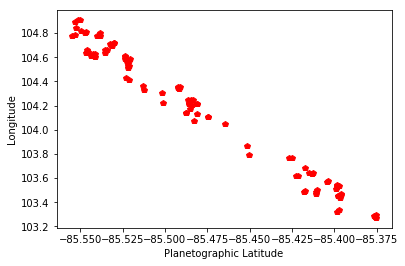

In [6]:
for n in range(100):
    plt.plot(fan.PlanetographicLatitude[n], fan.Longitude[n], 'rp')
    
plt.xlabel('Planetographic Latitude')
plt.ylabel('Longitude')

In [7]:
fpoints= []
for n in range(len(fan)):
    point = Point((fan.PlanetographicLatitude[n]),(fan.Longitude[n]))
    fpoints.append(point)

In [8]:
fpoints[1].x

-85.54622579999999

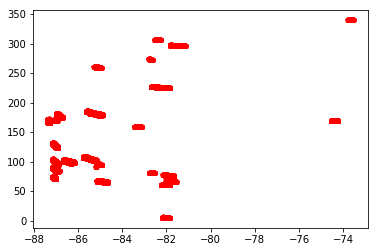

In [9]:
for i in range(len(fpoints)):
    plt.plot(fpoints[i].x, fpoints[i].y, 'rp')

In [ ]:
ll_pointmaker(blotch)

In [174]:
def ll_pointmaker(dset, color = 'ro'):
    dpoints = []
    for n in range(len(dset)):
        point = Point((dset.PlanetographicLatitude[n]),(dset.Longitude[n]))
        dpoints.append(point)
    
    for n in range(len(dset)):
        plt.plot(dpoints[n].x, dpoints[n].y, color)
        plt.xlabel('Planetographic Latitude')
        plt.ylabel('Longitude')

In [175]:
gf = fan.groupby('obsid')
gb = fan.groupby('obsid')

In [176]:
gb.size().head()

obsid
ESP_011296_0975    4472
ESP_011341_0980     455
ESP_011348_0950       4
ESP_011350_0945    1107
ESP_011351_0945    1636
dtype: int64

In [177]:
gfmlat = gf.PlanetographicLatitude.mean()
gfmlong = gf.Longitude.mean()
#within our grouped by obsid get mean values of lat at each obsid for fans
gbmlat = gb.PlanetographicLatitude.mean()
gbmlong = gb.Longitude.mean()

In [178]:
mllf = pd.concat([gfmlat, gfmlong], axis = 1)
#mean lat/long grouped by obsid for fans
mllb = pd.concat([gbmlat, gbmlong], axis = 1)

In [179]:
mllf.PlanetographicLatitude[1]

-81.896144643296623

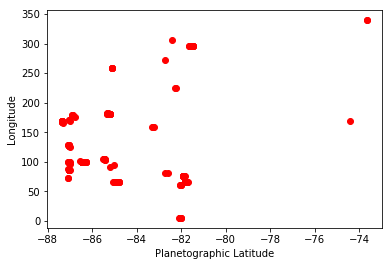

In [184]:
ll_pointmaker(mllf)

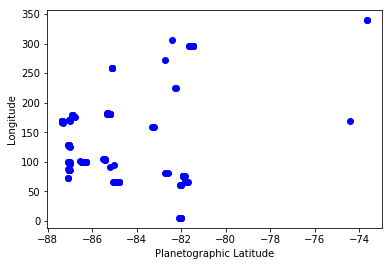

In [181]:
ll_pointmaker(mllb, color = 'bo')